<a href="https://colab.research.google.com/github/csmyth983/olympic_data/blob/master/Olympic_data_investigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
!pip install seaborn==0.9.0
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [0]:
# from google.colab import files
# uploaded = files.upload()

In [0]:
def read_from_github():
    url_start = 'https://raw.githubusercontent.com/csmyth983/olympic_data/master/'
    pt_1 = pd.read_csv(url_start + 'pt_1_athlete_events.csv')
    pt_2 = pd.read_csv(url_start + 'pt_2_athlete_events.csv')
    df = pd.concat([pt_1, pt_2])
    df = df.reset_index(drop=True)
    return df
athlete_events = read_from_github()
# athlete_events = pd.read_csv('athlete_events.csv')
# noc_regions = pd.read_csv('noc_regions.csv')

In [4]:
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


<class 'matplotlib.axes._subplots.AxesSubplot'>


Text(0.5, 1.0, 'Plot showing the number of Athletes and Nations competing,\nand number of Medals won at each of the Summer Olympic Games between 1896 and 2016')

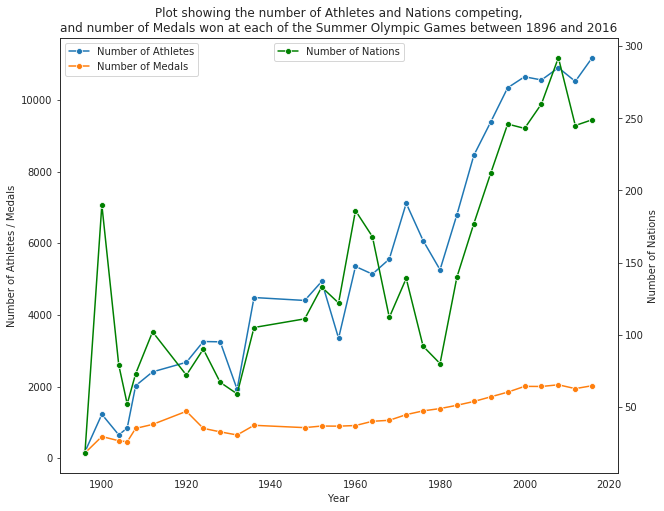

In [5]:
# Preparing the plot
sns.set_style('white')
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

# Plot the count of athletes for each year
working_df = athlete_events.copy()
working_df = working_df.loc[working_df['Season'] == 'Summer']
working_df = working_df.groupby(['Year'])['ID'].nunique().reset_index(name='count')
working_df.head()
ax = sns.lineplot(x='Year', 
             y='count',
             marker='o',
             data=working_df, 
             label= 'Number of Athletes')

# Plot the number of Medals awarded each year
working_df = athlete_events.copy()
working_df = working_df.loc[working_df['Season'] == 'Summer']
working_df['Medal Awarded'] = working_df['Medal'].notnull()
working_df = working_df.groupby(['Year'])['Medal Awarded'].sum().reset_index(name='count')
working_df.head()
ax = sns.lineplot(x='Year', 
             y='count',
             marker='o',
             data=working_df, 
             label= 'Number of Medals',
                 ax=ax)
print(type(ax))
plt.ylabel('Number of Athletes / Medals')
ax2 = ax.twinx()

# Plot the number of Nations competing
working_df = athlete_events.copy()
working_df = working_df.loc[working_df['Season'] == 'Summer']
working_df = working_df.groupby(['Year'])['Team'].nunique().reset_index(name='count')
working_df.head()
sns.lineplot(x='Year', 
             y='count',
             marker='o',
             data=working_df, 
             label= 'Number of Nations',
            ax=ax2,
            color='g')
plt.ylabel('Number of Nations')
plt.legend(loc=(9))

plt.title('Plot showing the number of Athletes and Nations competing,\nand number of Medals won at each of the Summer Olympic Games between 1896 and 2016')

## Introduction

The Olympic history dataset (the "Data Set") was created by rgriffin and published to Kaggle. It contains information on athletes who have competed in The Olympic Games (the "Games") between 1896 and 2016. The data shows information on the athletes, which nations they represented, the year, the discipline (the "Sport") and the events (the "Event") they participated in and also the medal that they won (if any).

The Data Set shows that there has been a significant increase in the number of nations and athletes competing in the Games over the 20th Century. The number of Sports and Events has also increased.

This analysis seeks to prove the existence of 'Home Advantage' (as defined below) in respect of a nation which hosts the Games in any given year (a "Host Nation"). It also looks at whether there is continued benefits for the Host Nation in the years preceeding and following the year in which they hosted the Games.


## Establishing Home Advantage 

The purpose of this analysis is to establish the existence of Home Advantage using the Data Set. For these purposes we will define 'Home Advantage' as an advantage gained by a nation hosting the Games which may present itself in the form of the following outcomes: 

1. An increased level of athlete participation for the Host Nation; and

2. An increased number of gold medals awarded to athletes representing the Host Nation. 

It is not possible to identify the causes of the Home Advantage gained by a Host Nation based on the information within the Data Set; however, one might attribute the increase in the social and economic awareness and resources given by the Host Nation in respect of the Games in the years around its hosting year as key causal factors. 

This analysis looks specifically at the following questions and themes: 

1.   Does the Host Nation get a Home Advantage in the year they host?
2.   Is the heightened level of participation continued for the Host Nation in the years following the Games?
3.   Does the Home Advantage apply equally to all Games?

## Preparing the Data Set

Before we can perform the analysis, we first need to transform our data into a format that is more workable for these particular questions. 

For the first two questions we want the Data Set to be in the form of one row per year per country. We also want to include columns containing information on the total number of gold medals, the total number of  medals and the total number of participants (each of these per year per nation).

We also are interested in the totals across all nations of these statistics, as this will help account for the variance caused by the overall increase in the level of participation and the number of nations across the different years (see the plot above).


In [0]:
# Here we create a dataframe object we can manipulate in memory,
# without editing the original copy
working_df = athlete_events.copy()
working_df = working_df.loc[working_df['Season'] == 'Summer']

# this array will be referred to, it will allow us to automate some
# adjustments we need to make
events = [
    {'Year': 2016, 'Country': 'Brazil'},
    {'Year': 2012, 'Country': 'Great Britain'},
    {'Year': 2008, 'Country': 'China'},
    {'Year': 2004, 'Country': 'Greece'},
    {'Year': 2000, 'Country': 'Australia'},
    {'Year': 1996, 'Country': 'United States'},
    {'Year': 1992, 'Country': 'Spain'},
    {'Year': 1988, 'Country': 'South Korea'}
]
# year = events[0]['Year']
# country = events[0]['Country']


In [0]:
# Now we begin to create the variables needed to perform the analysis
def create_summary_df(working_df, key_arr):
    # Country Level per Year
    # Summarised
    summarised_df = working_df.groupby(key_arr)['ID'].nunique(). \
        reset_index(name='count_participants')

    # Gold Medals
    gold_medals = working_df.loc[working_df['Medal'] == 'Gold']
    gold_medals = gold_medals.groupby(key_arr)['Medal'].count(). \
        reset_index(name='count_golds')
    summarised_df = summarised_df.merge(gold_medals, on=key_arr, how='left')

    # Total Medals
    total_medals = working_df.loc[working_df['Medal'].notnull()]
    total_medals = total_medals.groupby(key_arr)['Medal'].count(). \
        reset_index(name='count_medals')
    summarised_df = summarised_df.merge(total_medals, on=key_arr, how='left')
    summarised_df.head()

    
    global_key = [key for key in key_arr if 'Team' != key]
    # Now we find global counts for each
    global_df = working_df.groupby(global_key)['ID'].nunique(). \
        reset_index(name='global_participants')

    # Global Level per Year
    # Global Gold Medals for a given year
    global_gold = working_df.loc[working_df['Medal'] == 'Gold']
    global_gold = global_gold.groupby(global_key)['Medal'].count(). \
        reset_index(name='global_golds')
    global_df = global_df.merge(global_gold, on=global_key, how='left')

    # Global Total Medals for a given year
    global_total = working_df.loc[working_df['Medal'].notnull()]
    global_total = global_total.groupby(global_key)['Medal'].count(). \
        reset_index(name='global_medals')
    global_df = global_df.merge(global_total, on=global_key, how='left')

    summarised_df = summarised_df.merge(global_df, on=global_key, how='left')
    
    # Here we fill any missing values with 0 for our new features
    for col in summarised_df.columns.values:
        if col not in key_arr:
            summarised_df[col].fillna(0, inplace=True)

    return summarised_df


In [8]:
key_arr = ['Year', 'Team']
summarised_df = create_summary_df(working_df, key_arr)
summarised_df.head()


,Year,Team,count_participants,count_golds,count_medals,global_participants,global_golds,global_medals
0,1896,Australia,1,2.0,2.0,176,62,143
1,1896,Australia/Great Britain,2,0.0,2.0,176,62,143
2,1896,Austria,3,2.0,5.0,176,62,143
3,1896,Denmark,3,1.0,6.0,176,62,143
4,1896,Ethnikos Gymnastikos Syllogos,2,0.0,2.0,176,62,143


Now we have a table, with one row per Team per Year. For each, we have information
on the number of participants, gold and total medals. We also have information
on the countrywide statistics for the same Year (in the final three columns).

We create additional columns representing the ratios of the total in that year, this is so that when we create plots, the points we plot won't be as affected by the statistics changing year on year. For example, the number of participants in the early 21st century would be an order of magnitude higher than participants 100 years earlier.

In [9]:
summarised_df['ratio_participants'] = \
    summarised_df['count_participants'] / summarised_df['global_participants']

summarised_df['ratio_golds'] = \
    summarised_df['count_golds'] / summarised_df['global_golds']

summarised_df['ratio_medals'] = \
    summarised_df['count_medals'] / summarised_df['global_medals']

print(summarised_df.head())

   Year                           Team  count_participants  count_golds  \
0  1896                      Australia                   1          2.0   
1  1896        Australia/Great Britain                   2          0.0   
2  1896                        Austria                   3          2.0   
3  1896                        Denmark                   3          1.0   
4  1896  Ethnikos Gymnastikos Syllogos                   2          0.0   

   count_medals  global_participants  global_golds  global_medals  \
0           2.0                  176            62            143   
1           2.0                  176            62            143   
2           5.0                  176            62            143   
3           6.0                  176            62            143   
4           2.0                  176            62            143   

   ratio_participants  ratio_golds  ratio_medals  
0            0.005682     0.032258      0.013986  
1            0.011364     0.0000

In [0]:
# this function will allow us to consolidate several columns into a format 
# that is easily input into plots created within seaborn
def convert_to_columns(dat, arr_cols):
    reshaped_df = pd.DataFrame()
    for col in arr_cols:
        tmp_df = dat[['Year',col]].copy()
        tmp_df.columns = ['Year', 'ratio']
        tmp_df['group'] = col
        reshaped_df = pd.concat([reshaped_df, tmp_df])
    return reshaped_df

# This function creates a new column "Years Since Event", which represents
# The number of years between the given row and the year that Nation
# hosted the Games
def create_adj_years_col(dat, events):
    dat['Years Since Event'] = dat['Year']
    for event in events:
        year = event['Year']
        country = event['Country']
        dat = dat.loc[
            ((dat['Year'] >= year - 20) 
             & (dat['Year'] <= year + 20) 
             & (dat['Team'] == country)
            ) | (dat['Team'] != country)
        ]
        dat['Years Since Event'] = np.where(dat['Team'] == country, dat['Years Since Event'] - year, dat['Years Since Event'])
    return dat

# 1. Does the Host Nation get a Home Advantage in the year they host?

We will answer this question by establishing that the Host Nation experiences:
1. an increased level of participation;
2. an increased number of gold medals.

###  Let's first consider one country that recently hosted the Olympics - Great Britain (2012)

2012 - Great Britain


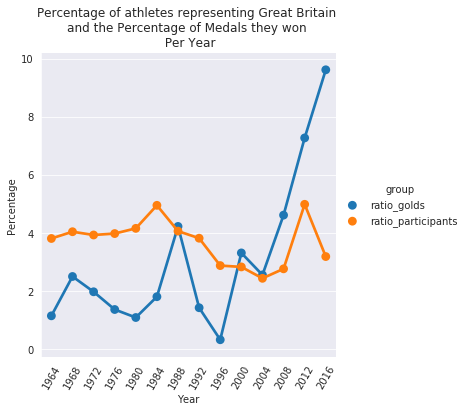

In [11]:
year = events[1]['Year']
country = events[1]['Country']
print('{} - {}'.format(year, country))

plot_df = summarised_df.copy()
plot_df = plot_df.loc[(plot_df['Year'] > 1960) & (plot_df['Team'] == country)]

plot_df = convert_to_columns(plot_df, ['ratio_golds', 'ratio_participants'])
plot_df['Percentage'] = plot_df['ratio'] * 100

sns.set_style('darkgrid')
sns.catplot(x='Year', 
            y='Percentage',
            hue='group',
            data=plot_df, 
            kind='point')
plt.xticks(rotation=60)
plt.title('Percentage of athletes representing {} \nand the Percentage of Medals they won \n Per Year'.format(country))
plt.show()


We have used Great Britain which hosted the Games in 2012 as an example. 

We can see from the plot above that there was a significant spike in the number of gold medals achieved by Great Britain and also in the level of participation in the 2012 Games. In this instance, it would appear that there was a Home Advantage gained by Great Britain as the Host Nation. 

Interestingly, the benefits of the Home Advantage appear to have continued for Great Britain, which also saw an increase in gold medals in the 2016 Games. 


### Let's next consider another Host Nation - United States (1996)

1996 - United States


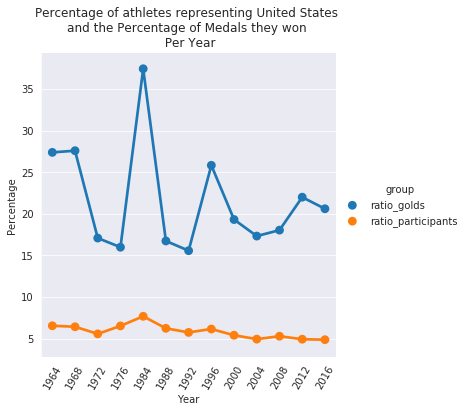

In [12]:
year = 1996
country = 'United States'
print('{} - {}'.format(year, country))

plot_df = summarised_df.copy()
plot_df = plot_df.loc[(plot_df['Year'] > 1960) & (plot_df['Team'] == country)]

plot_df = convert_to_columns(plot_df, ['ratio_golds', 'ratio_participants'])
plot_df['Percentage'] = plot_df['ratio'] * 100

sns.set_style('darkgrid')
sns.catplot(x='Year', 
            y='Percentage',
            hue='group',
            data=plot_df, 
            kind='point')
plt.xticks(rotation=60)
plt.title('Percentage of athletes representing {} \nand the Percentage of Medals they won \n Per Year'.format(country))
plt.show()


The United states hosted the Games, in both 1984 and 1996.

We can see from the plot that the United States won over one third of Gold Medals in the 1984 Games, and over one quarter in the 1996 Games. These increases indicate that the United States experienced a strong Home Advantage in terms of the number of Gold Medals, there appears to be no notable increase in the percentage of athletes representing the United States.

We should also note that there is a missing data point for the year 1980; this was the year in which Russia hosted the Games and the United States appears not to have competed.

### Let's next consider the experiences of a range of Host Nations

Now that we have looked at one nation's experience of Home Advantage, it would be interesting to see if these trends of increased participation and gold medals is common for other Host Nations too.

If we want to consider many Host Nations at once, we need to normalise the x axis in our plots, so that we are plotting the years before and after each of the Host's Games. (Our axis will take the values (-20, 20))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


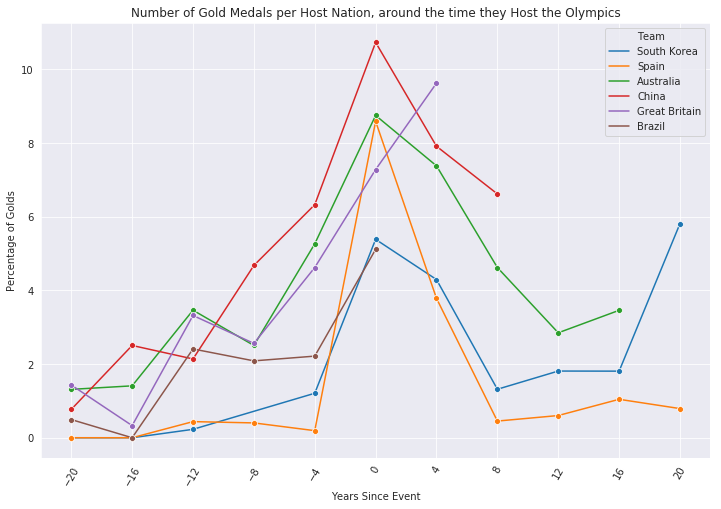

In [13]:
plot_df = summarised_df.copy()
plot_df['Years Since Event'] = plot_df['Year']
nations = [event['Country'] for event in events]
# nations.remove('United States')
years = [event['Year'] for event in events]
plot_df = plot_df.loc[plot_df['Team'].isin(nations)]

plot_df = create_adj_years_col(plot_df, events)

plot_df['Percentage of Golds'] = plot_df['ratio_golds'] * 100

plt.figure(figsize=(12,8))
sns.lineplot(x='Years Since Event', 
            y='Percentage of Golds',
            hue='Team', marker='o',
            data=plot_df.loc[(plot_df['Team'] !='United States') & (plot_df['Team'] !='Greece')])
plt.xticks(ticks=range(-20,24,4), rotation=60)
plt.title('Number of Gold Medals per Host Nation, around the time they Host the Olympics')
plt.show()

### x = -4 Years: 
In the plot, we can see that half of the Host Nations which we have looked at experience an increase in the number of gold medals in the preceding Games (ie, x = -4 Years). We can see that Australia, China and Great Britain all experienced such an increase; however, this is not guaranteed and we don't see any change  in the percentage of gold medals won by Brazil, Spain or South Korea. 

### x = 0 Years:
Now looking at the Host Nation's Games year (ie, x = 0 Years), we can see that there is a dramatic and definitive increase in the percentage of gold medals for all of the Host Nations. A notable jump was Spain which experienced a jump from approximately 0% to 8%. 

### x = 4 Years:
Another interesting trend which presents in the plot, is that whilst the number of gold medals achieved does experience a drop off in the following Games, the number of gold medals achieved remains significantly increased from the Host Nations average prior to its Games Year. 

We can speculate that this may be due to winners in the previous Olympics achieving better funding and therefore being able to train and deliver in the next set of Games also.


### Now we consider how the percentage of participants of the Host Nations changes over time

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


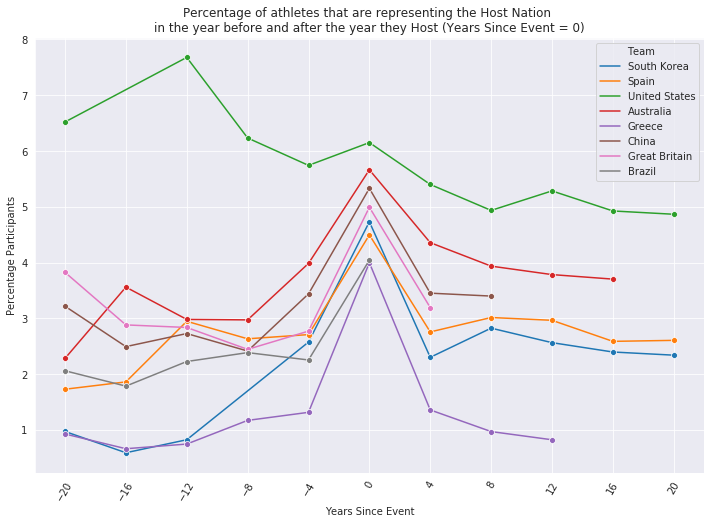

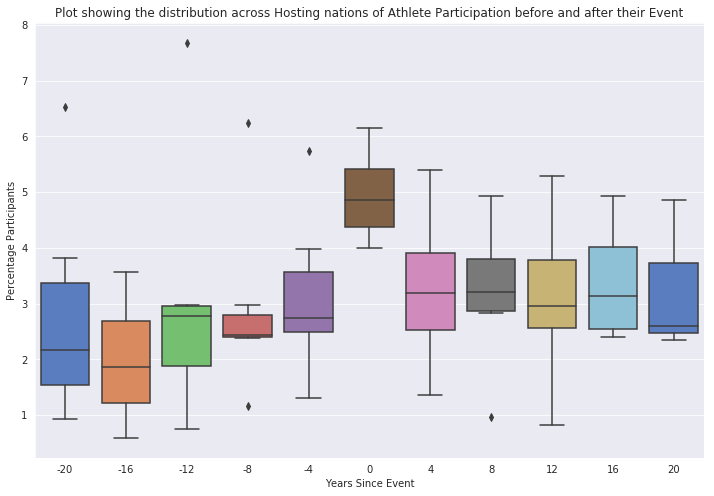

In [14]:
# 1: Line plot
plot_df = summarised_df.copy()

nations = [event['Country'] for event in events]
# nations.remove('United States')
years = [event['Year'] for event in events]
plot_df = plot_df.loc[plot_df['Team'].isin(nations)]
plot_df = create_adj_years_col(plot_df, events)
plot_df['Percentage Participants'] = plot_df['ratio_participants'] * 100

plt.figure(figsize=(12,8))
sns.lineplot(x='Years Since Event', 
            y='Percentage Participants',
            data=plot_df,
            hue='Team', marker='o',
            )
plt.xticks(ticks=range(-20,24,4), rotation=60)
plt.title('Percentage of athletes that are representing the Host Nation \nin the year before and after the year they Host (Years Since Event = 0)')
plt.show()


# 2: Box plot
plot_df['group'] = 'Host Year'
plot_df['group'] = np.where(plot_df['Years Since Event'] < 0, 'Before Host Year', plot_df['group'])
plot_df['group'] = np.where(plot_df['Years Since Event'] > 0, 'After Host Year', plot_df['group'])
averaged_before_and_after = plot_df.groupby(['group'])['Percentage Participants'].mean().reset_index(name='Average Percentage of Athletes')


plt.figure(figsize=(12,8))
sns.boxplot(y="Percentage Participants", x="Years Since Event", data=plot_df, 
            palette="muted")
plt.title('Plot showing the distribution across Hosting nations of Athlete Participation before and after their Event')
plt.show()

In the plot and box plot above, we can see a clear increase in participation for each Host Nation in the year in which they are hosting the Games. We can also see that in the next Games the percentage of participation reduces to previous levels. 

This is an interesting trend which does not necessarily correlate with the trend established with regard to the number of gold medals won (which as we seen above, continued to increase or stay above pre-host year levels in the Games immediately following the Host Nations Games (x = 4 Years)).

The boxplot in this case handles outliers well, the outliers around the top left of the plot exist because the United States hosted twice within 12 years.

# 3. Does the Home Advantage apply equally to all Games?
## Do Particular Sports have a greater Home Advantage than others?

We have already established that Home Advantage does exist for the Host Nation in the year that they host the Games. The next element that we would like to explore, is whether the Home Advantage is equally advantageous to all Sports, and if not, in which types of Sports would you gain the greatest Home Advantage.

We want to plot the ratio of Gold Medals awarded to the Host Nation, relative to the previous year, in each Sport over time. This means we need to tranform the Data to a level where one row represents a summary of one Sport in one year. We considered comparing this across each individual Country, but decided there would not be enough observations to provide a high level of accuracy in each group.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 864x576 with 0 Axes>

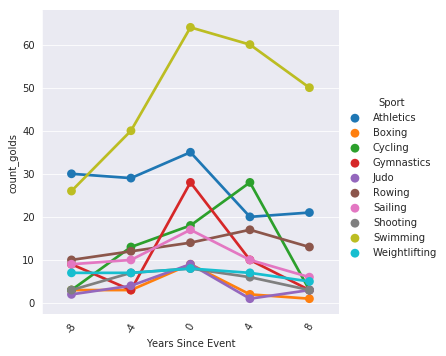

<Figure size 864x576 with 0 Axes>

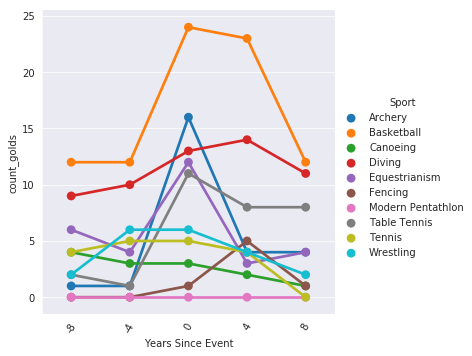

In [16]:
key_arr = ['Year', 'Team', 'Sport']
# key_arr = ['Year', 'Sport']
# We were able to use a function defined above, that created a summary

summarised_df = create_summary_df(working_df, key_arr)
summarised_df = summarised_df.loc[summarised_df['Team'].isin(nations)]
summarised_df = create_adj_years_col(summarised_df, events)

list_sports = summarised_df['Sport'].value_counts().reset_index(name='count')

summarised_df = summarised_df.groupby(['Years Since Event', 'Sport'])['count_participants', 'count_golds', 'count_medals'].sum().reset_index()

plot_df = summarised_df.loc[(summarised_df['Years Since Event'] > -12) & (summarised_df['Years Since Event'] < 12)]

for i in range(2):
    plt.figure(figsize=(12,8))
    sns.catplot(x='Years Since Event', 
                y='count_golds',
                hue='Sport',
                data=plot_df.loc[summarised_df['Sport'].isin(list_sports.iloc[i*10:(i* 10)+10]['index'].tolist())], 
                kind='point')
    plt.xticks(rotation=60)
    # plt.title('Number of Gold Medals per Host Nation,\naround the time they Host the Olympics')
    plt.show()

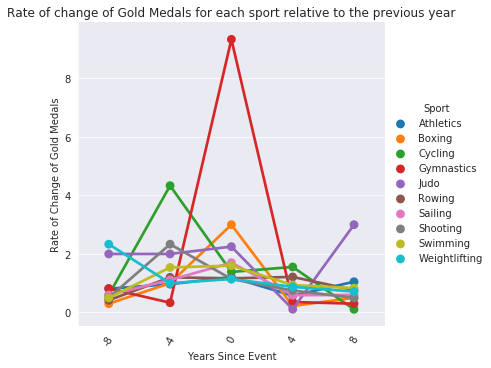

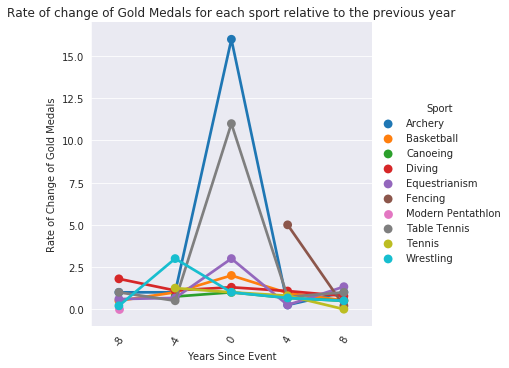

In [17]:
lag_golds = summarised_df.sort_values('Years Since Event').groupby(['Sport'])['count_golds'].shift(1).reset_index(name='lag_golds')
merged = summarised_df.merge(lag_golds, how='left', left_index=True, right_on='index')
merged = merged.loc[merged['lag_golds'].notnull()]
merged = merged.groupby(['Years Since Event', 'Sport'])[['count_golds', 'lag_golds']].sum().reset_index()
merged['Rate of Change of Gold Medals'] = merged['count_golds'] / merged['lag_golds']

plot_df = merged.loc[(merged['Years Since Event'] > -12) & (merged['Years Since Event'] < 12)]

for i in range(2):
    sns.catplot(x='Years Since Event', 
                y='Rate of Change of Gold Medals',
                hue='Sport',
                data=plot_df.loc[plot_df['Sport'].isin(list_sports.iloc[i*10:(i* 10)+10]['index'].tolist())], 
                kind='point')
    plt.xticks(rotation=60)
    plt.title('Rate of change of Gold Medals for each sport relative to the previous year')
    plt.show()

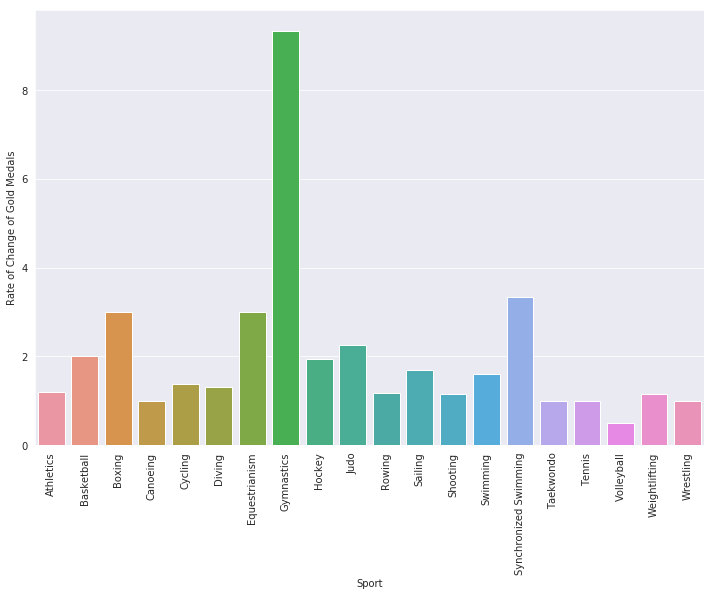

In [18]:
lag_golds = summarised_df.sort_values('Years Since Event').groupby(['Sport'])['count_golds'].shift(1).reset_index(name='lag_golds')
merged = summarised_df.merge(lag_golds, how='left', left_index=True, right_on='index')
merged = merged.loc[merged['lag_golds'].notnull()]
merged['Rate of Change of Gold Medals'] = merged['count_golds'] / merged['lag_golds']

# We want to apply a few filters:
merged = merged.loc[(merged['Years Since Event'] == 0)]
merged = merged.loc[merged['Rate of Change of Gold Medals'].notnull()]

# We are only considering when the previous number of gold medals > 2
# This way we are considering generally more popular events
# and preventing observations that cause very large values 
# (dividing by a number close to 0)
merged = merged.loc[merged['lag_golds'] > 2]
merged.head()
plt.figure(figsize=(12,8))
sns.barplot(x='Sport', y='Rate of Change of Gold Medals', data=merged.iloc[0:30])
plt.xticks(rotation=90)
plt.show()

For the sake of clarity, we have created two plot graphs to allow a clearer view of the data across all Sports. We have also created a bar chart which can more comfortably display the data across all Sports. 

We can identify from the plots and the bar chart above that some Sports do appear to benefit more readily from the Home Advantage. The following Sports In particular appear to benefit; Gymnastics (9x increase), Synchronized Swimming (3x increase), Boxing (3x increase) and Esquestrianism (3x increase). 

When creating the bar plot, some Sports with 2 or less total Gold medals in the preceeding Games (x = -4 Years) were filtered, this is because we didn't want our denominator to be too small as to exaggerate any trends. When we introduce this filter we are saying "We are not interested in highlighting trends for a Sport that is not regularly won by any of the 8 nations in question".

Whilst not all Sports experience the same high level of benefit, there are no Sports which experience a clear negative impact on the number of gold medals. 

# Conclusion

## 1.   Does Home Advantage exist?

Based on our analysis above, we conclude that the Home Advantage does exist and this advantage is seen through an increased level of athlete participation and number of gold medals achieved. 

We can also see that the benefits of the Home Advantage appears to persist in the next round of Games which the Host Nation participates in. We can see this trend through the number of gold medals won, which tends to remain at a higher level. Interestingly, this is despite the drop-off experienced in levels of athlete participation. 

As discussed above, it is not possible to identify the causes of the Home Advantage definitively, but it likely can be attributed to social and economic factors in addition to the psychological benefit of competing at home. 


## 2.   Is the heightened level of participation continued for the Host Nation in the years following the Games?

There is a notable spike in the number of athletes competing in their own Olympic Games, and although the number drops off in the years after, there is a marginal increase in the percentage of athletes competing in the years after compared to the years before.



## 3.   Does the Home Advantage apply equally to all Games?

Some sports experience a much more significant increase in Home Advantage than others. Gymnastics, Synchronised Swimming and Equestrianism, for example, all showed significant increases. One could possibly conclude that sports that require judges to score the performance benefit more from the Home Advantage rather than sports that have a more exact method of measurement, for example race times in Athletics.